<a href="https://colab.research.google.com/github/petrucior/verilog/blob/main/verilog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aulas de Verilog
---------------

Author: Petrúcio Medeiros

In [ ]:
# biblioteca do verilog
%%bash
sudo apt-get update
sudo apt-get install verilog iverilog gtkwave

In [ ]:
!pip install git+https://github.com/lesc-ufv/cad4u >& /dev/null
!git clone https://github.com/lesc-ufv/cad4u >& /dev/null
%load_ext plugin

# Estrutura básica do verilog
---

```verilog
module nome_modulo( lista_portas );
      // Declaração de portas

      // Variáveis intermediárias

      // Funcionamento do circuito
endmodule
```

- Inicia com `module` e encerra com `endmodule`
- Case-sensitive
- Todas as palavras chaves são minúsculas
- Espaços em branco não são interpretados
- Todos os comandos terminam em ponto-e-vírgula
- Comentário em uma única linha: //
- Comentário em múltiplas linhas: /* */

Exemplo:
```verilog
module halfadder( a, b, s, cout );
      ( ... )
endmodule
```

<img align="center" width="300" height="250" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Halfadder.gif/1280px-Halfadder.gif">


## Declaração de portas
---

- Portas são usadas para comunicação do módulo com o mundo exterior

  - **input** -> entrada;

  - **output** -> saída;

  - **inout** -> bidirecional (entrada/saída);

- Declaração de portas simples (1 bit):
```
<tipo_da_porta> nome_da_porta;
```

Exemplo:
```verilog
module halfadder( a, b, s, cout );
      input a, b; // Declarando a e b como entradas de 1 bit
      output s, cout; // Declarando s e cout como saidas de 1 bit
endmodule
```

- Declaração de barramentos (conjunto de bits):
```
<tipo_da_porta> [MSB:LSB] nome_da_porta;
```

Exemplo:
```verilog
module halfadder( a, b, cin, s, cout );
      input [3:0] a, b; // Declarando a e b como entradas de 4 bits
      input cin; // Declarando cin como entrada de 1 bit
      output [3:0] s; // Declarando s como saida de 4 bits
      output cout; // Declarando cout como saida de 1 bit
endmodule
```

- Definição de constantes (`parameter`)
  - São valores que permanecem constantes em todo o módulo, não podendo ter seus valores alterados
  - O uso de constantes pode tornar o código mais legível e mais fácil de atualizações
    - Obs.: A declaração de uma constante pode ser feita a qualquer momento no código verilog

- Declaração de constante:
```
parameter nome = valor;
```

Exemplo:
```verilog
module adder( a, b, cin, s, cout );
      parameter largura = 4;
      input [largura - 1:0] a, b; // Declarando a e b como entradas de 4 bits
      input cin; // Declarando cin como entrada de 1 bit
      output [largura - 1:0] s; // Declarando s como saida de 4 bits
      output cout; // Declarando cout como saida de 1 bit
endmodule
```

## Variáveis intermediárias
---

- São variáveis internas ao módulo
  - Tipo fio (Net Data Type): Representam uma conexão física (fio) interno ao módulo
  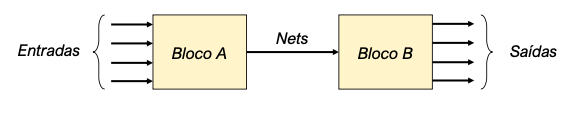
  
  - Registradores (Variable Data Type): Representam um armazenamento local (registrador)
  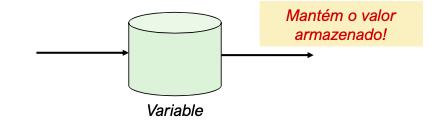


**Tipos de fios (Net Data Type)**
- Não apresentam capacidade de armazenamento

|`        Tipo                         `|`            Definição            `|
|:-------:|:-----------------------------------:|
|   wire  | Representa uma conexao (fio fisico) |
|   tri   |   Representa uma conexao tri-state  |
| supply0 |          Nivel logico BAIXO         |
| supply1 |          Nivel logico ALTO          |


Exemplo:
```verilog
wire ligacao;
wire [7:0] soma;
tri barramento; //permite três possíveis estados na saída do circuito: Nível lógico Alto, Nível lógico Baixo e Alta-impedância( Hi-Z)
```
Obs.: A declaração de Nets com mais de um bit é feita da mesma forma dos ports.

**Registrador (Variable Data Type)**
- Apresentam capacidade de armazenamento
- Mais comum: tipo `reg`
  - Não podem ser utilizados para ligação da saída de um bloco para entrada de outro (deve-se utilizar `wire`)
  - Podem ter seus valores mudados apenas por um procedimento (`always`)

|`        Tipo                         `|`            Definição            `|
|:------------------:|:-------------------------------:|
|         reg        |         Valor sem sinal         |
|     reg signed     |         Valor com sinal         |
|       integer      |   Inteiro com sinal de 32-bits  |
| real,time,realtime | Nao sintetizáveis pelo Hardware |

Exemplo:
```verilog
reg [7:0] resultado;
integer count;
```
Obs.: A declaração de Register com mais de um bit é feita da mesma forma dos ports.

Regras de entrada/saída:

|` Tipo de Variavel      `|`      Entrada      `|`      Saida     `|`      IN/OUT `|
|:----------------:|---------|-------|--------|
|        reg       | NAO     | SIM   | NAO    |
|       wire       | SIM     | SIM   | SIM    |

## Funcionamento do circuito
---

- Descreve como o circuito funciona


- Abordagens:

  - **Estrutural**: Descreve o circuito em termos das portas lógicas, blocos e suas interconexões;
  - **Fluxo de Dados (RTL)**: Descreve o circuito em termos de expressões (lógicas e aritméticas) que relacionam entradas e saídas;
  - **Hierárquica**: Descreve o circuito pela associação de blocos previamente definidos, permitindo a construção de um sistema maior;
  - **Comportamental**: Descreve o circuito em termos do seu comportamento (algoritmo);

### Descrição estrutural

- Descreve o circuito em termos das portas lógicas, blocos e suas interconexões
- Para isso, utiliza primitivas para construir o comportamento do circuito
- Blocos elementares (primitivas) -> **portas lógicas**

|    **Tipo de Primitivas**    	|    **Primitivas Existentes**    	|
|:----------------------------:	|:-------------------------------:	|
|     Portas multientradas     	|  and, or, nand, nor, xor e xnor 	|
| Portas com uma unica entrada 	|            not e buf            	|
|       Portas tri-state       	| bufif0, bufif1, notif0 e notif1 	|

- Para fazer um circuito usando as primitivas, basta referenciar a porta lógica e indicar as ligações.
  ```
  <primitiva> nome (ligação);
  ```

 - `primitiva`: and, or, nand, nor, xor, xnor, not, buf, bufif0, bufif1, notif0 ou notif1;
 - `nome`: Recomendável, mas não obrigatório;
 - `ligação`: como os pinos da primitiva estão ligados, separados entre virgulas
    - Primeiro item é sempre saída
    - Os itens seguintes são as entradas

Exemplos:
```verilog
/*
  Porta lógica: and
  Saída: x
  Entradas: a e b
  Nome: u0
*/
and u0 (x, a, b);
```

```verilog
/*
  Porta lógica: not
  Saída: y
  Entradas: x
  Nome: u1
*/
not u1 (y, x);
```

**Construir o circuito utilizando abordagem estrutural é só:**
- Referenciar as primitivas adequadas;
- Realizar as ligações entre elas.
Obs.: Para ligar a saída de uma primitiva para entrada de outra, deve-se declarar um fio intermediário (`wire`).

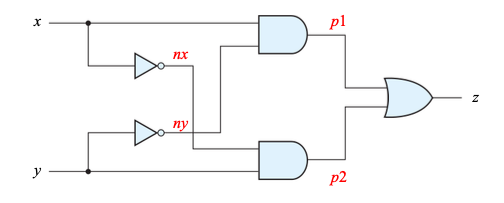

|` 	       x 	       `|` 	       y 	       `|` 	       nx 	       `|` 	       ny 	       `|` 	       p1 	       `|` 	       p2 	       `|` 	       z 	       `|
|-----------	|-------	|------------	|--------	|--------	|--------	|-------	|
| 0         	| 0     	| 1          	| 1      	| 0      	| 0      	| 0     	|
| 0         	| 1     	| 1          	| 0      	| 0      	| 1      	| 1     	|
| 1         	| 0     	| 0          	| 1      	| 1      	| 0      	| 1     	|
| 1         	| 1     	| 0          	| 0      	| 0      	| 0      	| 0     	|


Exemplos:
```verilog
/*
  Declaração do módulo
*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Variáveis (fios) intermediárias
  wire nx, ny, p1, p2;

  // Ligação estrutural
  not not0 (nx, x);
  not not1 (ny, y);
  and and0 (p1, x, ny);
  and and1 (p2, y, nx);
  or or0 (z, p1, p2);
endmodule
```

#### Simulação: Descrição estrutural



In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Variáveis (fios) intermediárias
  wire nx, ny, p1, p2;

  // Ligação estrutural
  not not0 (nx, x);
  not not1 (ny, y);
  and and0 (p1, x, ny);
  and and1 (p2, y, nx);
  or or0 (z, p1, p2);
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg a, b;
  wire c;

  parameter period = 1;

  circuito circuito1(.x(a),.y(b),.z(c));

  initial begin
    $dumpfile("circuito1.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    #period;

    a <= 0;
    b <= 1;
    #period;

    a <= 1;
    b <= 0;
    #period;

    a <= 1;
    b <= 1;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

Installing. Please wait... done!


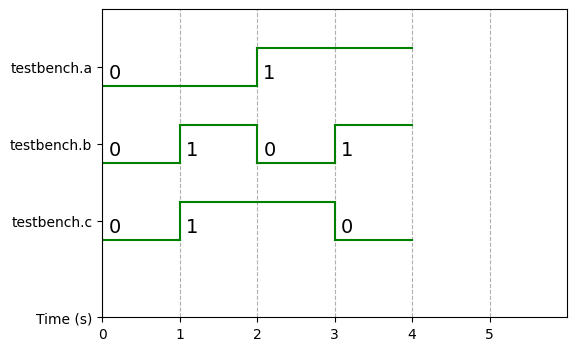

In [ ]:
%%waveform circuito1.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

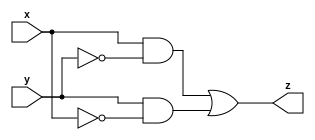

In [ ]:
%%print_verilog
/*

Módulo circuito

*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Variáveis (fios) intermediárias
  wire nx, ny, p1, p2;

  // Ligação estrutural
  not not0 (nx, x);
  not not1 (ny, y);
  and and0 (p1, x, ny);
  and and1 (p2, y, nx);
  or or0 (z, p1, p2);
endmodule

#### Exercício

Descrever o circuito usando a descrição estrutural.

| A 	| B 	| C 	| Z 	|
|---	|---	|---	|---	|
| 0 	| 0 	| 0 	| 1 	|
| 0 	| 0 	| 1 	| 1 	|
| 0 	| 1 	| 0 	| 1 	|
| 0 	| 1 	| 1 	| 1 	|
| 1 	| 0 	| 0 	| 1 	|
| 1 	| 0 	| 1 	| 1 	|
| 1 	| 1 	| 0 	| 1 	|
| 1 	| 1 	| 1 	| 1 	|

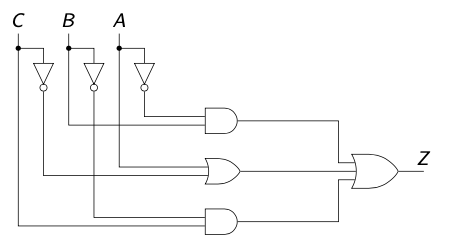

In [ ]:
%%file exercicio.sv

/*

Módulo exercicio

*/
module exercicio( /* Adicione aqui seu código */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Variáveis (fios) intermediárias
  /*
    Adicione seu código aqui
  */

  // Estrutura
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg a, b, c;
  wire z;

  parameter period = 1;

  exercicio circuito2(.a(a),.b(b),.c(c),.z(z));

  initial begin
    $dumpfile("circuito2.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    c <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

Overwriting testbench.v


In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito2.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.z']
time_begin = 0
time_end = 10
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Descrever o circuito usando a descrição estrutural.

<img src="https://i.stack.imgur.com/qKv9u.png" width="50%" height="50%"/>

In [ ]:
%%file exercicio.sv

/*

Módulo exercicio

*/
module exercicio( /* Adicione aqui seu código */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Variáveis (fios) intermediárias
  /*
    Adicione seu código aqui
  */

  // Estrutura
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg a, b, c;
  wire z;

  parameter period = 1;

  exercicio circuito3(.a(a),.ione(b),.izero(c),.q(z));

  initial begin
    $dumpfile("circuito3.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    c <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito3.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.z']
time_begin = 0
time_end = 10
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Descrever o circuito usando a descrição estrutural.

<img src="https://www.electronics-tutorials.ws/wp-content/uploads/2013/08/comb21.gif" width="50%" height="50%"/>

In [ ]:
%%file exercicio.sv

/*

Módulo exercicio

*/
module exercicio( /* Adicione aqui seu código */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Variáveis (fios) intermediárias
  /*
    Adicione seu código aqui
  */

  // Estrutura
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg a, b;
  wire c, d, e;

  parameter period = 1;

  exercicio circuito4(.a(a),.b(b),.c(c), .d(d), .e(e));

  initial begin
    $dumpfile("circuito4.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    #period;

    a <= 0;
    b <= 1;
    #period;

    a <= 1;
    b <= 0;
    #period;

    a <= 1;
    b <= 1;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito4.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.d', 'testbench.e']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

### Descrição por fluxo de dados

- Descreve o circuito em termos de expressões (lógicas e aritméticas) que relacionam entradas e saídas;
- Para isso, utiliza a diretiva -> **assign**

  ```
  assign <saída ou net> = (constante/segmento de vetor/expressão);
  ```
  Obs.: Não utilizar o **assign** para mudar valores de variáveis do tipo **reg**.

- **Declaração de constantes:**

  ```
  <tamanho>’<base><valor>
  ```

 - `tamanho`: quantidade de bits
 - `base`:
    - d ou D: Decimal
    - h ou H: Hexadecimal
    - b ou B: Binário
    - o ou O: Octal

  Exemplos:
  ```verilog
  /*
    Atribuição de constantes
  */
  assign x = 16’d255; // Decimal de 16 bits com valor 255
  assign y = 8’hA0;   // Hexadecimal de 8 bits com valor A0
  assign z = 4’b1001; // Binário de 4 bits com valor 1001
  assign w = 6’o12;   // Octal de 6 bits com valor 12
  ```
  Observações:
  - Quando não explicitado o tamanho e o tipo, considere um valor do tipo **decimal** de **32 bits**
  ```verilog
  assign v = 12;      // Decimal de 32 bits com valor 12
  ```
  - Representação de valores negativos (em complemento de 2) adicionamos um sinal de menos **antes da especificação**.
  ```verilog
  assign j = -8’d12;  // Decimal negativo de 8 bits (complemento de 2)
  ```


  - Caracteres especiais:
    - Underline (_): usado para melhorar a legibilidade
  ```verilog
  assign x = 8’b1001_0011; // Binário de 8 bits com valor 10010011
  ```
    - X ou x: usado para valores desconhecidos
  ```verilog
  assign y = 8’hAx;        // 4 bits menos significativos desconhecidos
  ```
    - z ou Z: Alta impedância
  ```verilog
  assign z = 1’oZ;         // 1 bit em alta impedância
  ```

- **Declaração de um segmento de vetor:**

  Vetor **x** com tamanho **(inicio-fim)+1**:
  ```
  assign x = y[inicio:fim];
  ```

  Exemplos:
  ```verilog
  /*
    Atribuição de constantes
  */
  assign x = y[5:2];
  assign z = y[1:0];
  ```

- **Declaração de expressões:**

Operadores Lógicos:
  
  1. Bit-wise: aplicados bit-a-bit dos operandos

| Operador 	| Operação Realizada 	| Exemplo:<br>a = 4’b1010<br>b = 4’b0011 	|
|:--------:	|:------------------:	|:---------------------------------------:	|
|     ~    	|         NOT        	|               ~a = 4’b0101              	|
|     &    	|         AND        	|             a & b = 4’b0010             	|
|    \|    	|         OR         	|             a \| b = 4’b1011            	|
|     ^    	|         XOR        	|             a ^ b = 4’b1001             	|
| ~^ ou ^ ~ 	|        XNOR        	|             a ~^ b = 4’b0110            	|


Exemplos:
  ```verilog
  assign x = ~a;        // O operador NOT tem apenas um operando
  assign y = a & b;     // AND
  assign z = a | b;     // OR
  assign q = a & b & c; // AND
  assign w = a ^ b;     // XOR
  assign e = a ^ b ^c;  // XOR
  assign r = a ~^ b;    // XNOR
  ```
Observações:
- Os operadores Bit-wise valem mesmo que os operandos
tenham apenas um bit
- A quantidade de bits da saída de um operador Bit-wise é
igual a quantidade de bits do operando mais longo (há preenchimento com zeros)


  2. Redução: Possuem apenas um operando e reduzem um vetor a um único bit. Além disso, a operação é feita com os bits do operando

|   Operador  |   Operação Realizada  |   Exemplo:  a = 4’b1010  |
|:-----------:|:---------------------:|:------------------------:|
|       &     |           AND         |         &a = 1’b0        |
|      ~&     |          NAND         |         ~&a = 1’b1        |
|      \|     |           OR          |         \|a = 1’b1       |
|      ~\|    |           NOR         |        ~\|a = 1’b0       |
|       ^     |           XOR         |         ^a = 1’b0        |
|  ~^ ou ^ ~ |          XNOR         |         ~^a = 1’b1       |

Exemplos:
  ```verilog
  assign x = &a;  // AND
  assign y = ~&a; // NAND
  assign z = |a;  // OR
  assign q = ~|a; // NOR
  assign w = ^a;  // XOR
  assign e = ~^a; // XNOR
  ```

  3. Lógicos: Resultam em um único bit, independente da quantidade de bits das entradas;
    - Entrada diferente de zero -> 1
    - Entrada igual a zero -> 0

| Operador 	| Operação Realizada 	| Exemplo: <br> a = 3’b101 <br> b = 3’b000 	|
|:--------:	|:------------------:	|:------------------------------:	|
|     !    	|         NOT        	|       !a = 1’b0 <br> !b = 1’b1      	|
|    &&    	|         AND        	|          a && b = 1’b0         	|
|   \|\|   	|         OR         	|         a \|\| b = 1’b1        	|
  
Exemplos:
  ```verilog
  assign x = a && b;
  assign y = a || b;
  assign z = !a;
  ```


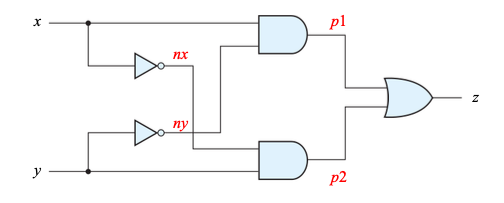

|` 	       x 	       `|` 	       y 	       `|` 	       nx 	       `|` 	       ny 	       `|` 	       p1 	       `|` 	       p2 	       `|` 	       z 	       `|
|-----------	|-------	|------------	|--------	|--------	|--------	|-------	|
| 0         	| 0     	| 1          	| 1      	| 0      	| 0      	| 0     	|
| 0         	| 1     	| 1          	| 0      	| 0      	| 1      	| 1     	|
| 1         	| 0     	| 0          	| 1      	| 1      	| 0      	| 1     	|
| 1         	| 1     	| 0          	| 0      	| 0      	| 0      	| 0     	|


Exemplos:
```verilog
/*
  Declaração do módulo
*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Fluxo de dados
  assign z = ( x & ~y ) | ( y & ~x );
endmodule
```

Operadores Aritméticos

| Operador 	| Operação Realizada 	| Exemplo: <br>a = 11 <br>b= 5 	|
|:--------:	|:------------------:	|:----------------------------:	|
|     +    	|        Soma        	|          a + b = 16          	|
|     -    	|      Subtração     	|             a – b = 6            	|
|     *    	|    Multiplicação   	|           a * b = 55           	|
|     /    	|       Divisão      	|            a / b = 2           	|
|     %    	|  Resto da divisão  	|            a % b = 1           	|

Exemplos:
```verilog
assign x = a + b;
assign y = a - b;
assign w = a * b;
assign z = a / b;
```

![full-subtract](https://www.electronicshub.org/wp-content/uploads/2015/06/4-bit-Subtractor.jpg)

Exemplos:
```verilog
/*
  Declaração do módulo
*/
module circuito( a, b, d );
  // Declaração de portas
  input [3:0] a, b; // Entradas
  output [3:0] d;   // Saída

  // Fluxo de dados
  assign d = (a - b);
endmodule
```

Operadores Deslocamento
  - Operam sobre vetores
  - Os bits deslocados são perdidos, e as posições anteriores destes bits são preenchidas com zeros;

| Operador 	|    Operação Realizada   	| Exemplo:<br>a = 4’b0110 	|
|:--------:	|:-----------------------:	|:------------------------:	|
|    <<    	| Deslocamento à esquerda 	|      a<<1 = 4’b1100      	|
|    >>    	|  Deslocamento à direita 	|      a>>1 = 4’b0011      	|

Exemplos:
```verilog
assign x = a << 1;
assign y = a >> 1;
```

Operadores de Concatenação e Replicação
  - Junta os operandos e forma um novo vetor

| Operador 	| Operação Realizada 	| Exemplo: <br>a = 3’b011 <br>b = 2’b01 	|
|:--------:	|:------------------:	|:-------------------------------------:	|
|    {}    	|    Concatenação    	|            {a,b} = 5’b01101           	|
|   {{ }}  	|     Replicação     	|           {3{b}} = 6’b010101          	|

Exemplos:
```verilog
assign x = {a, b};
assign y = {2{a}};
```

Operadores Relacionais
  - São usados para comparar dois operandos;
  - Resultado é zero (0) quando a comparação é falsa e um (1) caso contrário


| Operador 	| Operação Realizada 	| Exemplo: <br>a = 4’b0110 <br>b = 4’b0011 <br>c = 4’b0011 	|
|:--------:	|:------------------:	|:--------------------------------------------------------:	|
|     >    	|      Maior que     	|                       a > b = 1’b1                       	|
|     <    	|      Menor que     	|                       a < b = 1’b0                       	|
|    ==    	|       Igual a      	|                       a == b = 1’b0                      	|
|    >=    	| Maior ou igual que 	|              a >= b = 1’b1 <br>a >= c = 1’b1             	|
|    <=    	| Menor ou igual que 	|                       a <= b = 1’b0                      	|
|    !=    	|      Diferente     	|                       a != b = 1’b1                      	|

Exemplos:
```verilog
assign x = a != b; // Avaliando se a e b são diferentes
assign y = a >= b; // Avaliando se a é maior que b
```

![xnor](https://www.electronics-tutorial.net/wp-content/uploads/2015/08/XNOR1.png)


Exemplo:
```verilog
/*
  Declaração do módulo
*/
module circuito( a, b, y );
  // Declaração de portas
  input a, b; // Entradas
  output y;   // Saída

  // Fluxo de dados
  assign y = (a == b);
endmodule
```

- **Atribuição Condicional:**

  Corresponde a um ternário em C
  ```verilog
  assign x = (condição) ? (verdadeiro) : (falso);
  ```

  Exemplo:
  ```verilog
  /*
    verifica c
    se c = 1 (verdadeiro), então x = 4’b0010
    se c = 0 (falso), então x = 4’b1100
  */
  assign x = c ? 4’b0010 : 4’b1100;
  ```

![mux](https://www.researchgate.net/publication/340612297/figure/fig14/AS:962178924441600@1606412740008/a-Multiplexer-schematic-structure-b-truth-table-of-the-mux-based-on-inputs-c-truth.png)


Exemplo:
```verilog
/*
  Declaração do módulo
*/
module circuito( a, b, s, out );
  // Declaração de portas
  input a, b, s; // Entradas
  output out;   // Saída

  // Fluxo de dados
  assign out = s ? a : b;
endmodule
```

#### Simulação: operações lógicas

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito( x, y, z );
  // Declaração de portas
  input x, y; // Entradas
  output z;   // Saída

  // Fluxo de dados
  assign z = ( x & ~y ) | ( y & ~x );
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg a, b;
  wire c;

  parameter period = 1;

  circuito circuito5(.x(a),.y(b),.z(c));

  initial begin
    $dumpfile("circuito5.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    #period;

    a <= 0;
    b <= 1;
    #period;

    a <= 1;
    b <= 0;
    #period;

    a <= 1;
    b <= 1;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

Overwriting testbench.v


In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

VCD info: dumpfile circuito5.vcd opened for output.


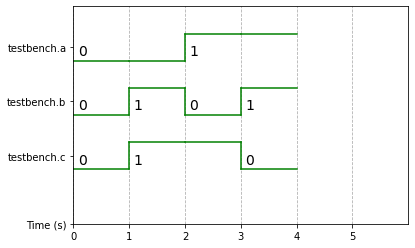

In [ ]:
%%waveform circuito5.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício
Descreva o circuito correspondente a um somador completo (Full-Adder) em Verilog utilizando a abordagem por fluxo de dados e utilizando operadores lógicos.

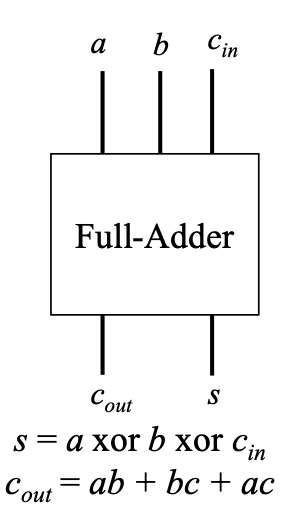


In [ ]:
%%file exercicio.sv

/*

Módulo exercicio

*/
module exercicio( /* Adicione aqui seu código */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Fluxo de dados
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg a, b, c;
  wire d, e;

  parameter period = 1;

  exercicio circuito6(.a(a),.b(b),.cin(c),.cout(d),.s(e));

  initial begin
    $dumpfile("circuito6.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    c <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito6.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.d', 'testbench.e']
time_begin = 0
time_end = 14
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Descrever o circuito usando fluxo de dados e operadores lógicos.

| A 	| B 	| C 	| Z 	|
|---	|---	|---	|---	|
| 0 	| 0 	| 0 	| 1 	|
| 0 	| 0 	| 1 	| 1 	|
| 0 	| 1 	| 0 	| 1 	|
| 0 	| 1 	| 1 	| 1 	|
| 1 	| 0 	| 0 	| 1 	|
| 1 	| 0 	| 1 	| 1 	|
| 1 	| 1 	| 0 	| 1 	|
| 1 	| 1 	| 1 	| 1 	|

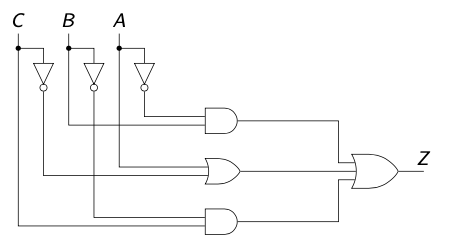

In [ ]:
%%file exercicio.sv

/*

Módulo exercicio

*/
module exercicio( /* Adicione aqui seu código */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Fluxo de dados
  /*
    Adicione seu código aqui
  */

endmodule

Writing exercicio.sv


In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg a, b, c;
  wire z;

  parameter period = 1;

  exercicio circuito7(.a(a),.b(b),.c(c),.z(z));

  initial begin
    $dumpfile("circuito7.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    c <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

Writing testbench.v


In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

VCD info: dumpfile circuito7.vcd opened for output.


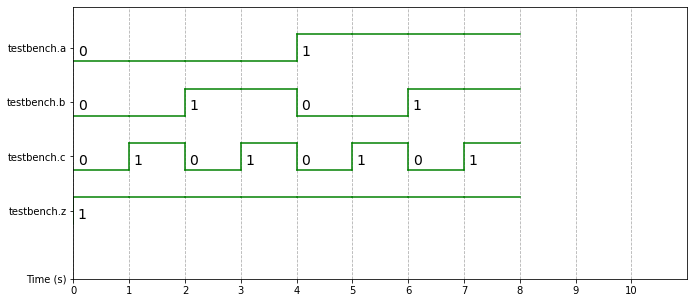

In [ ]:
%%waveform circuito7.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.z']
time_begin = 0
time_end = 10
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Descrever o circuito usando a descrição por fluxo de dados e operadores lógicos.

<img src="https://i.stack.imgur.com/qKv9u.png" width="50%" height="50%"/>

In [ ]:
%%file exercicio.sv

/*

Módulo exercicio

*/
module exercicio( /* Adicione aqui seu código */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Fluxo de dados
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg a, b, c;
  wire z;

  parameter period = 1;

  exercicio circuito8(.a(a),.ione(b),.izero(c),.q(z));

  initial begin
    $dumpfile("circuito8.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    c <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito8.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.z']
time_begin = 0
time_end = 10
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Descrever o circuito usando a descrição por fluxo de dados e operadores lógicos.

<img src="https://www.electronics-tutorials.ws/wp-content/uploads/2013/08/comb21.gif" width="50%" height="50%"/>

In [ ]:
%%file exercicio.sv

/*

Módulo exercicio

*/
module exercicio( /* Adicione aqui seu código */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Fluxo de dados
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg a, b;
  wire c, d, e;

  parameter period = 1;

  exercicio circuito9(.a(a),.b(b),.c(c), .d(d), .e(e));

  initial begin
    $dumpfile("circuito9.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    #period;

    a <= 0;
    b <= 1;
    #period;

    a <= 1;
    b <= 0;
    #period;

    a <= 1;
    b <= 1;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito9.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.d', 'testbench.e']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Simulação: operador aritmético

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito( a, b, d );
  // Declaração de portas
  input [3:0] a, b; // Entradas
  output [3:0] d;   // Saída

  // Fluxo de dados
  assign d = (a - b);
endmodule

Overwriting circuito.sv


In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg [3:0] a, b;
  wire [3:0] c;

  parameter period = 1;

  circuito circuito10(.a(a),.b(b),.d(c));

  initial begin
    $dumpfile("circuito10.vcd");
    $dumpvars;

    a <= 4'b0010;
    b <= 4'b0001;
    #period;

    a <= 4'b0100;
    b <= 4'b0010;
    #period;

    a <= 4'b1011;
    b <= 4'b0100;
    #period;

    a <= 4'b0100;
    b <= 4'b0100;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

Overwriting testbench.v


In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

VCD info: dumpfile circuito10.vcd opened for output.


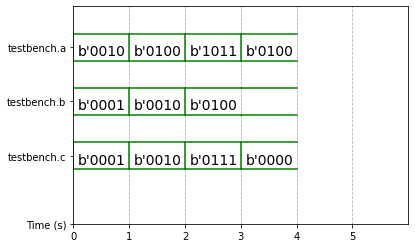

In [ ]:
%%waveform circuito10.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício
Descreva o circuito correspondente a um somador de 4-bits em Verilog utilizando a abordagem por fluxo de dados e utilizando operadores aritméticos.

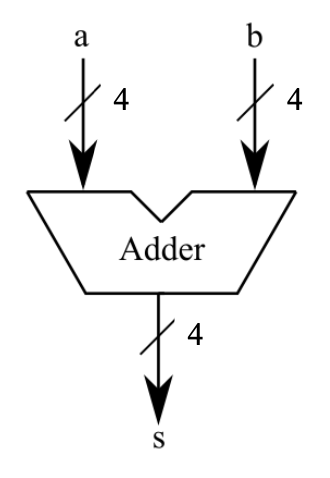

In [ ]:
%%file exercicio.sv

/*

Módulo exercicio

*/
module exercicio( /* Adicione aqui seu código */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Fluxo de dados
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg [3:0] a, b;
  wire [3:0] c;

  parameter period = 1;

  exercicio circuito11(.a(a),.b(b),.s(c));

  initial begin
    $dumpfile("circuito11.vcd");
    $dumpvars;

    a <= 4'b0010;
    b <= 4'b0001;
    #period;

    a <= 4'b0100;
    b <= 4'b0010;
    #period;

    a <= 4'b1011;
    b <= 4'b0100;
    #period;

    a <= 4'b0100;
    b <= 4'b0100;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito11.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Simulação: operador relacional

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito( a, b, y );
  // Declaração de portas
  input a, b; // Entradas
  output y;   // Saída

  // Fluxo de dados
  assign y = (a == b);
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg a, b;
  wire c;

  parameter period = 1;

  circuito circuito12(.a(a),.b(b),.y(c));

  initial begin
    $dumpfile("circuito12.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    #period;

    a <= 0;
    b <= 1;
    #period;

    a <= 1;
    b <= 0;
    #period;

    a <= 1;
    b <= 1;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

Overwriting testbench.v


In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

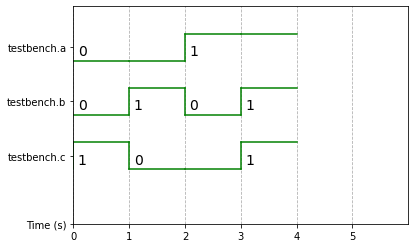

In [ ]:
%%waveform circuito12.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício
Descreva o circuito correspondente a um comparador de magnitude de 4 bits em Verilog utilizando a abordagem por fluxo de dados e utilizando operadores relacionais.

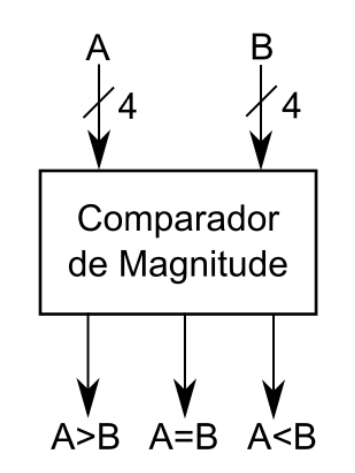


In [ ]:
%%file exercicio.sv

/*

Módulo exercicio

*/
module exercicio( /* Adicione aqui seu código */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Fluxo de dados
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg [3:0] a, b;
  wire c, d, e;

  parameter period = 1;

  exercicio circuito13(.a(a),.b(b),.c(c),.d(d),.e(e));

  initial begin
    $dumpfile("circuito13.vcd");
    $dumpvars;

    a <= 4'b1000;
    b <= 4'b0010;
    #period;

    a <= 4'b0011;
    b <= 4'b0011;
    #period;

    a <= 4'b0001;
    b <= 4'b1100;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito13.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.d', 'testbench.e']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

In [ ]:
%%bash
iverilog exercicio.v -o exercicio
vvp exercicio

#### Simulação: atribuição condicional


In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito( a, b, s, out );
  // Declaração de portas
  input a, b, s; // Entradas
  output out;   // Saída

  // Fluxo de dados
  assign out = s ? a : b;
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg a, b, c;
  wire z;

  parameter period = 1;

  circuito circuito13(.a(a),.b(b),.s(c),.out(z));

  initial begin
    $dumpfile("circuito13.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    c <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

Overwriting testbench.v


In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

VCD info: dumpfile circuito13.vcd opened for output.


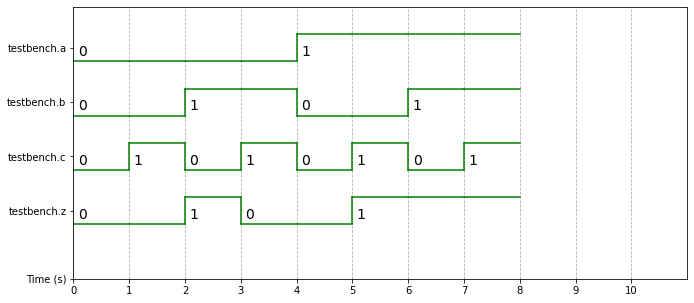

In [ ]:
%%waveform circuito13.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.z']
time_begin = 0
time_end = 10
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício
Descreva o circuito correspondente a um multiplexador 2x1 em Verilog utilizando a abordagem por fluxo de dados e utilizando atribuição condicional.

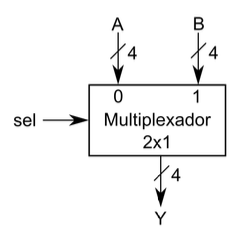

In [ ]:
%%file exercicio.sv

/*

Módulo circuito

*/
module exercicio( /* Adicione seu código aqui */ );

  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Operador relacional
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg [3:0] a, b;
  reg c;
  wire [3:0] z;

  parameter period = 1;

  exercicio circuito14(.a(a),.b(b),.sel(c),.y(z));

  initial begin
    $dumpfile("circuito14.vcd");
    $dumpvars;

    a <= 4'b0010;
    b <= 4'b0101;
    c <= 0;
    #period;

    a <= 4'b0010;
    b <= 4'b0101;
    c <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito14.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.z']
time_begin = 0
time_end = 10
base = 'bin' # bin, dec, dec2, hex, octal

### Descrição por hierarquia

- Descreve o circuito pela associação de blocos previamente definidos, permitindo a construção de um sistema maior;
- Para isso, usa blocos já definidos pelo usuário, que devem ser instanciados (referenciados);

  Declaração:
  ```
  <nome_modulo> nome( mapeamento )
  ```

 - `nome_modulo`: Nome do módulo a ser referenciado
 - `nome`: nome da instância específica do módulo
 - `mapeamento`: forma que as entradas e saídas estão ligadas
    - lista:
      - As entradas/saídas devem ser colocadas na ordem que foram declaradas
      Exemplo:
      ```
      half_adder ha1( a1, b1, s1, c1 );
      ```
    - Nome:
      - As entradas/saídas são associadas a pinos específicos do módulo
      Exemplo:
      ```
      half_adder ha1( .a(a1), .b(b1), .s(s1), .cout(c1) );
      ```

  Observações:
    - Usa o **wire** de forma similiar à descrição estrutural
    - Os módulos devem estar:
      - No projeto do módulo principal
      - No arquivo do módulo principal


![ands](http://www.edwardbosworth.com/My5155Text_V07_HTM/MyText5155_Ch04_V07_files/image051.gif)

```verilog
// Descrevendo uma porta and
module and2x1 (x, y, z);
  // Declaração de portas
  input x, y;
  output z;

  // Descrição por fluxo de dados
  assign z = x & y;
endmodule


module circuito (a, b, c, d, abcd);
  // Declaração de portas
  input a, b, c, d;
  output abcd;

  // Variáveis (fios) intermediárias
  wire ab, cd;

  // Descrição por hierarquia
  and2x1 a1 (a, b, ab);
  and2x1 a2 (c, d, cd);
  and2x1 a3 (ab, cd, abcd);
endmodule
```

#### Simulação: descrição por hierarquia

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/

// -------------------------------
// Criando módulo simples
// -------------------------------
module and2x1 (x, y, z);
  // Declaração de portas
  input x, y;
  output z;

  // Descrição estrutural
  and and1 (z, x, y);
endmodule

// -------------------------------
// Reutilizar módulo construído
// -------------------------------
module circuito (a, b, c, d, abcd);
  // Declaração de portas
  input a, b, c, d;
  output abcd;

  // Variáveis (fios) intermediárias
  wire ab, cd;

  // Descrição por hierarquia
  and2x1 and1 (a, b, ab);
  and2x1 and2 (.x(c), .y(d), .z(cd));  //and2x1 and2 (c, d, cd);
  and2x1 and3 (ab, cd, abcd);
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg a, b, c, d;
  wire z;

  parameter period = 1;

  circuito circuito15(.a(a),.b(b),.c(c),.d(d),.abcd(z));

  initial begin
    $dumpfile("circuito15.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    c <= 0;
    d <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 0;
    d <= 1;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    d <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    d <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    d <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    d <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    d <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    d <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    d <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    d <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    d <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    d <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    d <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    d <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    d <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    d <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

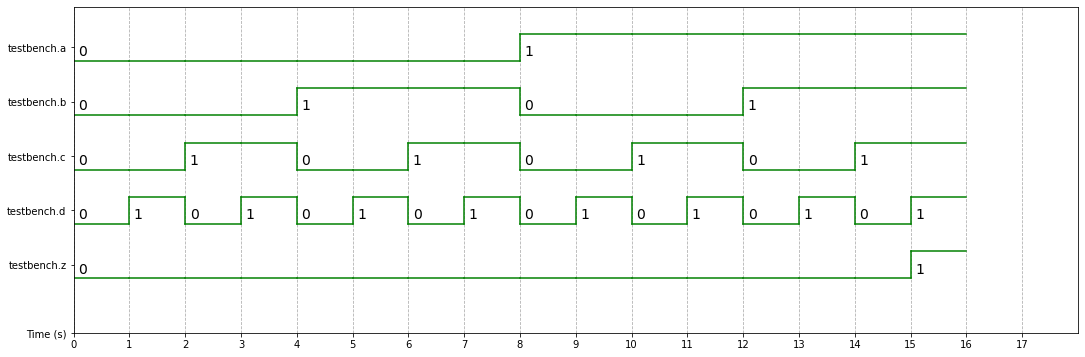

In [ ]:
%%waveform circuito15.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.d', 'testbench.z']
time_begin = 0
time_end = 17
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

a. Descreva um multiplexador 2x1 em Verilog. Utilize a abordagem que julgar necessário.

b. Descreva o circuito correspondente a um multiplexador 4x1 em Verilog utilizando a abordagem por hierarquia a partir do multiplexador 2x1 projetado no item (a).

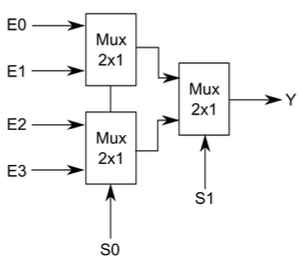

In [ ]:
%%file exercicio.sv

/*

Módulo circuito

*/

// -------------------------------
// Módulo simples
// -------------------------------
module modulosimples( /* Adicione seu código aqui */  );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Descrição da funcionalidade
  /*
    Adicione seu código aqui
  */
endmodule

module exercicio( /* Adicione seu código aqui */ );

  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Variáveis intermediárias
  /*
    Adicione seu código aqui
  */

  // Descrição por hierarquia
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg a, b, c, d, e, f;
  wire z;

  parameter period = 1;

  exercicio circuito16(.e0(a),.e1(b),.e2(c),.e3(d),.s0(e),.s1(f),.y(z));

  initial begin
    $dumpfile("circuito16.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    c <= 0;
    d <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 0;
    d <= 1;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    d <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    d <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    d <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    d <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    d <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    d <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    d <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    d <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    d <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    d <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    d <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    d <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    d <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    d <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito16.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.d', 'testbench.z']
time_begin = 0
time_end = 17
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Descreva uma Unidade Lógica e Artimética (ULA) em Verilog utilizando a abordagem por hierarquia.

<img src="http://www.antigo.fpgaparatodos.com.br/newsite/images/stories/exemplo/ULA/ULA_diagrama.png" width="50%" height="50%"/>

| **OPERACAO** |   **Operação realizada**  |
|:------------:|:-------------------------:|
|      000     |           Adição          |
|      001     |         Subtração         |
|      010     |         'E' Lógico        |
|      011     |        'OU' Lógico        |
|      100     |       'OU' Exclusivo      |


In [ ]:
%%file exercicio.sv

/*

Módulo circuito

*/

// -------------------------------
// Módulo simples
// -------------------------------
module modulosimples( /* Adicione seu código aqui */  );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Descrição da funcionalidade
  /*
    Adicione seu código aqui
  */
endmodule

module exercicio( /* Adicione seu código aqui */ );

  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Variáveis intermediárias
  /*
    Adicione seu código aqui
  */

  // Descrição por hierarquia
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg [3:0] a, b;
  reg [2:0] c;
  wire [3:0] z;

  parameter period = 1;

  exercicio circuito17(.a(a),.dado(b),.operacao(c),.s(z));

  initial begin
    $dumpfile("circuito17.vcd");
    $dumpvars;

    // Soma
    a <= 4'b0010;
    b <= 4'b0001;
    c <= 3'b000;
    #period;

    // Subtracao
    a <= 4'b0100;
    b <= 4'b0010;
    c <= 3'b001;
    #period;

    // E logico
    a <= 4'b1011;
    b <= 4'b0100;
    c <= 3'b010;
    #period;

    // Ou logico
    a <= 4'b0110;
    b <= 4'b1100;
    c <= 3'b011;
    #period;

    // Ou exclusivo
    a <= 4'b0110;
    b <= 4'b0101;
    c <= 3'b100;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito17.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.z']
time_begin = 0
time_end = 6
base = 'bin' # bin, dec, dec2, hex, octal

### Descrição comportamental

- Descreve o circuito em termos do seu comportamento (algoritmo);
- A descrição comportamental deve ser especificada em **procedimentos**;
- O procedimento tem (geralmente) uma lista de sensibilidade e somente quando alguma variável da lista muda é que o procedimento executa.
  - Enquanto isso, os valores de saída não são alterados;
  - Desta forma, um processo só pode manipular variáveis do tipo **reg** nunca do tipo **wire**
- Um módulo pode conter vários procedimentos;
- Os procedimentos não podem ser alinhados (um procedimento não pode conter outro);
- Todos os procedimentos são executados de forma paralela;

**Tipos de procedimentos:**
  - **initial**:
    - Executado uma única vez;
    - Utilizado para inicialização de variáveis ou monitoramento (bancada de testes);

    - Declaração:
    ```verilog
    initial begin
      (...)
    end
    ```
    - Obs.: Não possui lista de sensibilidade.

  - **always**:
    - Executado constantemente;
    - Utilizado para descrever o funcionamento de um circuito;
    - Declaração:
    ```verilog
    always @(lista sensibilidade) begin
      (...)
    end
    ```
    - Os procedimentos `always` podem ser de dois tipos:
      - Combinacionais: Sensível a todas as entradas
      ```verilog
      always @(A,B,S,X)
      always @*
      ```
      [<img src="https://www.embarcados.com.br/wp-content/uploads/2015/11/Multiplexador.png" width="50%"/>](image)

        Exemplo:
        
        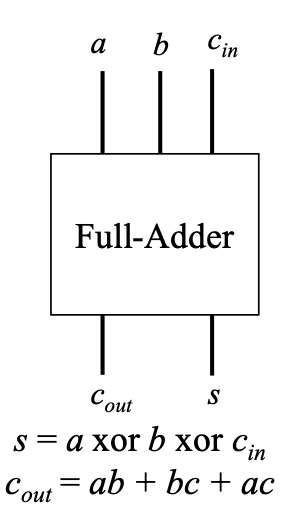

        ```verilog
        module circuito (a, b, cin, s, cout);
          // Declaração de portas
          input a, b, cin;
          output s, cout;
          reg cout;

          assign s = a ^ b ^ cin; // modulo combinacional

          // Descrição comportamental
          always @(a or b or cin) begin
            cout = (a & b) | (a & cin) | (b & cin);
          end
        endmodule
        ```

      - Sensíveis ao Clock: Sensível ao clock ou aos sinais de controle
      ```verilog
      always @(posedge clk, negedge clr_n)
      ```
      ![ff.png](https://www.monografias.com/trabajos96/introduccion-flip-flop/image014.jpg)

      - Obs.: O `begin` e o `end` são necessários apenas se o procedimento tiver mais de uma linha.
      - Obs.: Nos procedimentos sensíveis ao clock, utiliza-se duas diretivas:
        * **posedge**: Sensível a borda de subida;
        * **negedge**: Sensível a borda de descida;
      - Dentro do procedimento pode-se realizar atribuições de variáveis;
        - A variável que recebe o valor da expressão deve ser do tipo **reg**;
        - Não há o termo `assign`;
        - Deve estar dentro do procedimento;
        - Só é feita quando o procedimento é executado;
      - Observações:
        - Quando usa o termo `assign` a atribuição é contínua;
          - Quando um dos termos da expressão muda, a saída muda ao mesmo tempo;
        - Quando usa uma atribuição dentro de um procedimento, ela é procedural;
          - A saída só muda quando o procedimento é executado;
          - Porém, nada impede que a lista de sensibilidade inclua todas as entradas;


**Descrever um contador crescente de 4-bits (módulo-16) em Verilog utilizando a abordagem comportamental com contagem a cada borda de subida do relógio.**

![contador](https://wiki.sj.ifsc.edu.br/images/0/0f/Fig145_DIG222802.gif)

```verilog
module circuito (clk, q);
  // Declaração de portas
  input clk;
  output reg [3:0] q;

  // Descrição comportamental
  always @(posedge clk) begin
    q = q + 4'd1;
  end
endmodule  
```

- **Estruturas de decisão, seleção ou de repetição:**
  - **Obs.: Definida somente dentro de um procedimento**
  - Estrutura de decisão: **if-else**;
  - Declaração:
  ```verilog
  if (condicao_1) begin
    (...)
  end
  else if (condicao_2) begin
    (...)
  end
    (...)
  else begin
    (...)
  end
  ```

**Descrever um Flip-Flop D com entrada de reset em Verilog utilizando a abordagem comportamental. O Flip-Flop é sensível as bordas de subida, tanto do reset como do relógio. O reset é assíncrono, ou seja, tem prioridade em cima do relógio.**

![ffd](https://blog.eletrogate.com/wp-content/uploads/2020/11/1200px-d-type_flip-flop-svg-250x300.png)

```verilog
module circuito (clk, rst, d, q);
  // Declaração de portas
  input clk, rst, d;
  output reg q;

  // Descrição comportamental
  always @(posedge clk, posedge rst) begin
    if (rst == 1) q = 1'b0;
    else q = d;
  end
endmodule
```

  - Estruturas de seleção: **case** e **casex**;
  - Declaração:
  ```verilog
  case (identificador) begin
    (valor1): begin
       (...)
    end
    (valor2): begin
       (...)
    end
    default: begin // opcional
       (...)
    end
  end
  ```

    ![mux4x1](https://www.researchgate.net/profile/Shyam-Akashe/publication/257799438/figure/fig1/AS:341731565424653@1458486562832/MUX-graphical-symbol-a-truth-table-b.png)

  ```verilog
  module circuito ( a, b, c, d, s0, s1, out);
  // Declaração de portas
  input a, b, c, d;
  input s0, s1;
  output reg out;

  // Descrição comportamental
  always @(a or b or c or d or s0, s1) begin
    case (s0 | s1)
      2'b00 : out <= a;
      2'b01 : out <= b;
      2'b10 : out <= c;
      2'b11 : out <= d;
    endcase
  end
  endmodule
  ```

  ```verilog
  casex (identificador) begin
    (valor1): begin
       (...)
    end
    (valor2): begin
       (...)
    end
    default: begin // opcional
       (...)
    end
  end
  ```

  - Adiciona os valores 'x' ou 'z' como don't care.

**Descreva um registrador de 4-bits de propósito geral em Verilog com a seguinte tabela de operação**

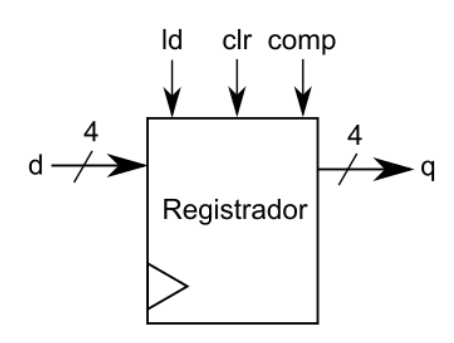

  | ld 	| clr 	| comp 	|   comentario   	|
  |:--:	|:---:	|:----:	|:--------------:	|
  |  0 	|  0  	|   0  	|     mantem     	|
  |  0 	|  0  	|   1  	|   complementa  	|
  |  0 	|  1  	|   x  	|      zera      	|
  |  1 	|  x  	|   x  	| carga paralela 	|

  ```verilog
  module circuito ( clk, d, ld, clr, comp, q);
  // Declaração de portas
  input clk, ld, clr, comp;
  input [3:0] d;
  output reg [3:0] q;

  // Descrição comportamental
  always @(posedge clk) begin
    casex ({ld, clr, comp})
      3'b001 : q = ~q;
      3'b01x : q = 4'b0000;
      3'b1xx : q = d;
    endcase
  end
endmodule
  ```

  - Estruturas de repetição: **repeat** e **for**;
    
    (next lecture!)

  - **Estruturas de repetição: for**
  - Necessita de:
    - Uma condição inicial;
    - Uma condição de parada;
    - Uma condição de iteratividade;
  - Declaração:
  ```verilog
  for (cond_inicial, cond_parada, incremento) begin
    (...)
  end
  ```
  - Obs.: Geralmente utiliza-se uma variável do tipo `integer` para o contador do laço.

**Implemente um somador de 4-bits em Verilog a partir de operações de um somador completo realizada em uma estrutura de laço**

![somador4bits](https://www.mspc.eng.br/dir61/im01/eldig12_1.png)

Obs.:
s = a xor b xor cin
cout = ab + bc + ac

```verilog
module circuito (a, b, cin, s, cout);
  // Declaração de portas
  input [3:0] a, b;
  input cin;
  output reg cout;
  output reg [3:0] s;

  // Variáveis auxiliares
  reg c;
  integer i;

  // Descrição comportamental
  always @(*) begin
    c = cin;
    for (i = 0; i <= 3; i=i+1) begin
      s[i] = a[i] ^ b[i] ^ c;
      c = (a[i] & b[i]) | (a[i] & c) | (b[i] & c);
    end
    cout = c;
  end
endmodule
```

**Atribuições**

Dentro de um procedimento podemos usar dois tipos de atribuições (em alguns casos geram comportamentos distintos):
  - Bloqueável (=) use em `lógica combinacional`
    - São executadas na ordem em que são especificadas;
    - Se existem duas designações de bloqueamento consecutivas, a segunda designação não pode ser executada até que a primeira tenha finalizado;
  - Não-bloqueável (<=) use em `lógica sequencial`
    - São executadas ao mesmo tempo;
    - Se existem duas designações de não-bloqueamento consecutivas, a segunda designação é executada ao mesmo tempo em que a primeira.

**Máquina de estados**
- Circuitos combinacionais
- Elementos de memória (registrador de estados)

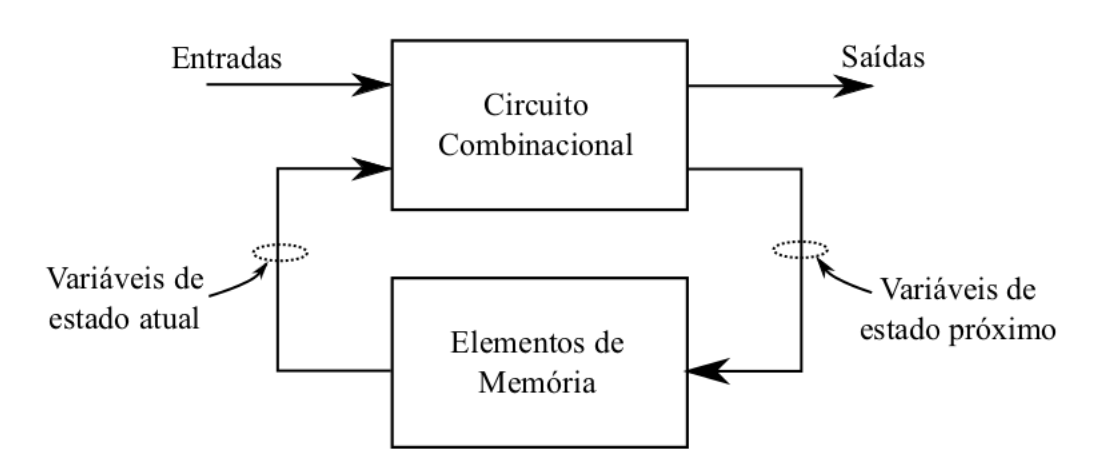

Variáveis (`reg`):
- Variáveis de estado atual;
- Variáveis de estado próximo;
Obs.: Os estados devem ser codificados e declarados como parâmetros

*Divisão em 2 procedimentos* (`always`):
- Procedimento Combinacional
  - Analisa o estado presente e as entradas para gerar o estado seguinte e as saídas;
  - Sensibilidade: Variáveis de estado presente e de entrada;
  - Deve-se utilizar um `case`, com identificador de variável de estado atual, para definir o estado seguinte e a saída;
- Procedimento Sequencial
  - Armazena (registra) as variáveis de estado;
  - Sensibilidade: Clock e Reset;
  - Na borda de subida do Clock, o estado seguinte torna-se o atual;
  - Na borda de subida do Reset, volta-se ao estado inicial da máquina;

**Implemente, em verilog, a máquina de estados abaixo:**

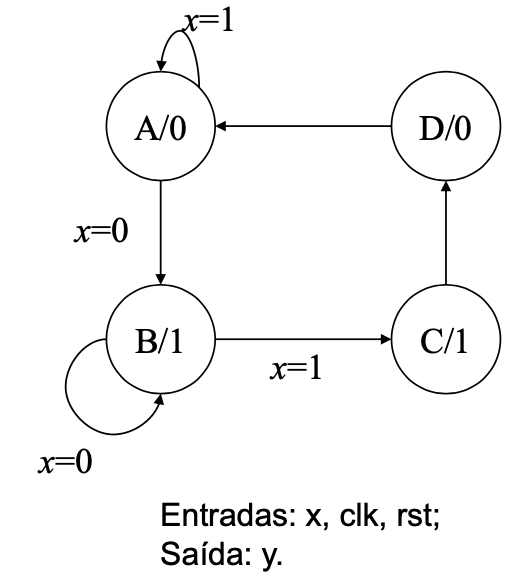

```verilog
  module circuito ( clk, rst, x, y);
  // Declaração de portas
  input clk, rst, x;
  output reg y;

  // Declarando estados da máquina
  reg [1:0] estado_atual, estado_proximo;

  parameter A = 2'b00,
            B = 2'b01,
            C = 2'b10,
            D = 2'b11;

  // Reset e mudança de estado
  always @(posedge clk, posedge rst) begin
    if ( rst ) estado_atual <= A;
    else estado_atual <= estado_proximo;
  end

  // Descrição comportamental
  always @(estado_atual, x) begin
    case ({estado_atual})
      A : begin
        y = 0;
        if ( x == 1 ) estado_proximo = A;
        else estado_proximo = B;
      end
      B : begin
        y = 1;
        if ( x == 1 ) estado_proximo = C;
        else estado_proximo = B;
      end
      C : begin
        y = 1;
        estado_proximo = D;
      end
      D : begin
        y = 0;
        estado_proximo = A;
      end
    endcase
  end
endmodule
```

**Memórias**

Arranjo de N `reg`, cada `reg` com M bits, em outras palavras, é uma memória N x M

Declaração:
```verilog
reg [M-1:0] nome_arranjo [N-1:0];
```

Exemplos:
```verilog
reg [7:0] memoria [1023:0]; // Memória com 1024 posições com 8 bits cada (1 byte)
```

O acesso a uma determinada posição do arranjo é feita da mesma forma que `vetores`, mas no caso, retorna-se um vetor de bits;

Exemplo:
```verilog
wire [7:0] x;
assign x = memoria[52]; // Lê a posição 52 do arranjo memória, que tem 8 bits (1 byte)
```

**Implemente, em Verilog, um banco de registradores com 16 posições de 1 byte cada, que possua uma porta de leitura e uma porta de escrita, conforme Figura abaixo. Atenção: A Leitura é assíncrona!**

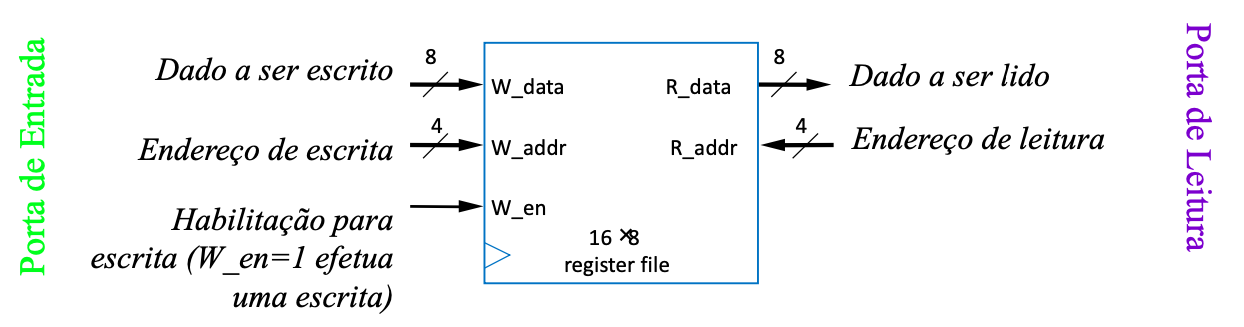

```verilog
module circuito( clk, w_data, w_addr, w_en, r_data, r_addr );
  // Declaração de portas
  input [7:0] w_data;
  input [3:0] w_addr, r_addr;
  input clk, w_en;
  output [7:0] r_data;

  // Declarando banco de memória
  reg [7:0] register_file [15:0];

  // Descrição comportamental
  always @( posedge clk ) begin
    if ( w_en ) register_file[w_addr] <= w_data;
  end

  assign r_data = register_file[r_addr];

endmodule
```

Para inicialização das memórias, pode-se utilizar as diretivas ```$readmemb``` (inicialização em binário) e ```$readmemh``` (inicialização em hexadecimal), desde que dentro de um procedimento ```initial```;

Declaração:
```verilog
initial begin
  $readmemb("single_port_rom_init.txt", rom);
end
```
- single_port_rom_init.txt: Arquivo de inicialização da memória (sem formatação);
- rom: arranjo no qual deseja-se iniciar;


#### Simulação: descrição comportamental (Combinacional)

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito (a, b, cin, s, cout);
  // Declaração de portas
  input a, b, cin;
  output s, cout;
  reg cout;

  assign s = a ^ b ^ cin; // modulo combinacional

  // Descrição comportamental
  always @(a or b or cin) begin
    cout = (a & b) | (a & cin) | (b & cin);
  end
endmodule

Writing circuito.sv


In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg a, b, c;
  wire z, w;

  parameter period = 1;

  circuito circuito18(.a(a),.b(b),.cin(c),.s(z), .cout(w));

  initial begin
    $dumpfile("circuito18.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    c <= 0;
    #period;

    a <= 0;
    b <= 0;
    c <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 1;
    #period;

    a <= 1;
    b <= 0;
    c <= 0;
    #period;

    a <= 1;
    b <= 0;
    c <= 1;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

Writing testbench.v


In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

VCD info: dumpfile circuito18.vcd opened for output.


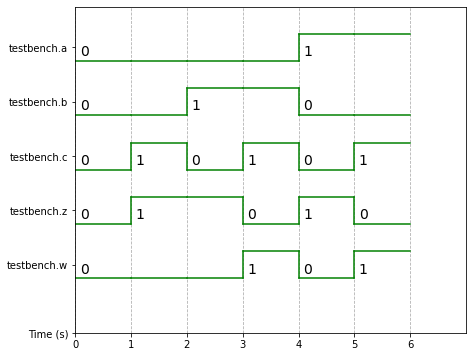

In [ ]:
%%waveform circuito18.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.z', 'testbench.w']
time_begin = 0
time_end = 6
base = 'bin' # bin, dec, dec2, hex, octal

#### Simulação: descrição comportamental (Sensíveis ao clock)

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito (clk, q);
  // Declaração de portas
  input clk;
  output reg [3:0] q;

  // Descrição comportamental
  always @(posedge clk) begin
    q = q + 4'd1;
  end
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg clk;
  wire [3:0] q;

  parameter period = 1;

  circuito circuito19(.clk(clk), .q( q ));

  initial begin
    $dumpfile("circuito19.vcd");
    $dumpvars;
    clk <= 0;
    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

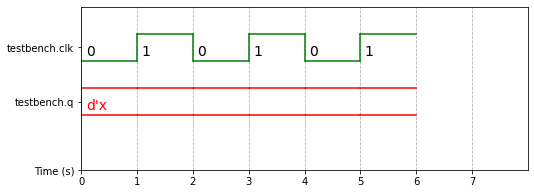

In [ ]:
%%waveform circuito19.vcd

sign_list = ['testbench.clk','testbench.q']
time_begin = 0
time_end = 7
base = 'dec' # bin, dec, dec2, hex, octal

#### Simulação: FF D

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito (d, rst, clk, q);
  // Declaração de portas
  input clk, rst, d;
  output reg q;

  // Descrição comportamental
  always @(posedge clk, posedge rst) begin
    if (rst == 1'b1 ) q = 1'b0;
    else q = d;
  end
endmodule

Overwriting circuito.sv


In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg clk, rst, d;
  wire q;

  parameter period = 1;

  circuito circuito20(.d(d), .rst(rst), .clk( clk ), .q( q ));

  initial begin
    $dumpfile("circuito20.vcd");
    $dumpvars;
    clk <= 0;
    rst = 1;
    d = 0;
    #period;

    rst = 0;
    d = 1;
    #period;

    rst = 1;
    d = 1;
    #period;

    rst = 0;
    d = 1;
    #period;

    rst = 0;
    d = 0;
    #period;

    rst = 0;
    d = 0;
    #period;

    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

Overwriting testbench.v


In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

VCD info: dumpfile circuito20.vcd opened for output.


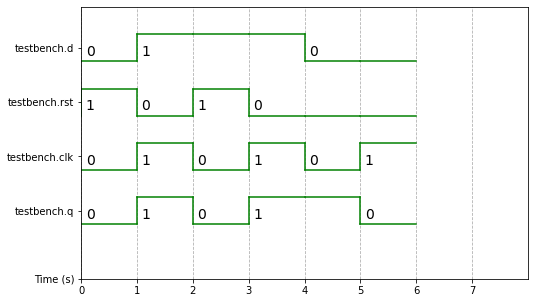

In [ ]:
%%waveform circuito20.vcd

sign_list = ['testbench.d','testbench.rst', 'testbench.clk', 'testbench.q']
time_begin = 0
time_end = 7
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício
Descreva um Flip-Flop JK com entrada de reset em Verilog utilizando a **abordagem comportamental**. O Flip-Flop é sensível as bordas de descida, tanto do reset como do relógio. O reset é assíncrono, ou seja, tem prioridade em cima do relógio.

![ff jk](https://wiki.ifsc.edu.br/mediawiki/images/d/d4/FFjk03.png)

In [ ]:
%%file exercicio.sv

/*

Módulo circuito

*/
module exercicio ( /* Adicione seu código aqui */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Descrição comportamental
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg clk, j, k;
  wire q;

  parameter period = 1;

  exercicio circuito21(.j(j), .k(k), .clk( clk ), .q( q ));

  initial begin
    $dumpfile("circuito21.vcd");
    $dumpvars;
    clk <= 0;
    j = 0;
    k = 0;
    #period;

    j = 1;
    k = 0;
    #period;


    j = 0;
    k = 1;
    #period;

    j = 0;
    k = 0;
    #period;

    j = 1;
    k = 1;
    #period;

    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito21.vcd

sign_list = ['testbench.j','testbench.k', 'testbench.clk', 'testbench.q']
time_begin = 0
time_end = 7
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício
Descreva um Flip-Flop SR com entrada de reset em Verilog utilizando a **abordagem comportamental**. O Flip-Flop é sensível as bordas de descida, tanto do reset como do relógio. O reset é assíncrono, ou seja, tem prioridade em cima do relógio.

![ff jk](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2zHAqXRsmxXaFGCCc7YETcqJvGum4XpD0ftnM3w19JAj7qPHNcGtoc9IR944nMXKLnw&usqp=CAU)

In [ ]:
%%file exercicio.sv

/*

Módulo circuito

*/
module exercicio ( /* Adicione seu código aqui */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Descrição comportamental
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg clk, s, r;
  wire q;

  parameter period = 1;

  exercicio circuito22(.s(s), .r(r), .clk( clk ), .q( q ));

  initial begin
    $dumpfile("circuito22.vcd");
    $dumpvars;
    clk <= 0;
    s = 0;
    r = 0;
    #period;

    s = 1;
    r = 0;
    #period;


    s = 0;
    r = 1;
    #period;

    s = 0;
    r = 0;
    #period;

    s = 1;
    r = 1;
    #period;

    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito22.vcd

sign_list = ['testbench.s','testbench.r', 'testbench.clk', 'testbench.q']
time_begin = 0
time_end = 7
base = 'bin' # bin, dec, dec2, hex, octal

#### Simulação: Mux 4x1

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito ( a, b, c, d, s0, s1, out);
  // Declaração de portas
  input a, b, c, d;
  input s0, s1;
  output reg out;

  // Descrição comportamental
  always @(*) begin
    case ({s0, s1})
      2'b00 : out <= a;
      2'b01 : out <= b;
      2'b10 : out <= c;
      2'b11 : out <= d;
    endcase
  end
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg a, b, c, d, e, f;
  wire z;

  parameter period = 1;

  circuito circuito23(.a(a),.b(b),.c(c),.d(d),.s0(e),.s1(f),.out(z));

  initial begin
    $dumpfile("circuito23.vcd");
    $dumpvars;

    a <= 0;
    b <= 1;
    c <= 0;
    d <= 1;
    e <= 0;
    f <= 0;
    #period;

    a <= 1;
    b <= 1;
    c <= 0;
    d <= 1;
    e <= 0;
    f <= 1;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    d <= 1;
    e <= 1;
    f <= 0;
    #period;

    a <= 0;
    b <= 1;
    c <= 0;
    d <= 1;
    e <= 1;
    f <= 1;
    #period;

    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

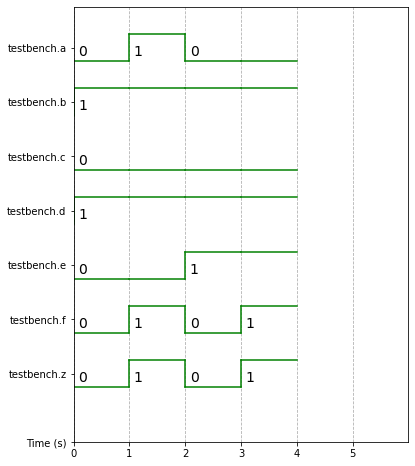

In [ ]:
%%waveform circuito23.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c', 'testbench.d', 'testbench.e', 'testbench.f', 'testbench.z']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Descreva um buffer tri-state com entrada de Enable em Verilog utilizando a **abordagem comportamental**.

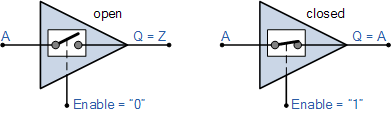

| Enable 	| A 	| Q 	|
|:------:	|:-:	|:-:	|
|    0   	| 0 	|  Z 	|
|    0   	| 1 	|  Z 	|
|    1   	| 0 	|  0 	|
|    1   	| 1 	|  1 	|

In [ ]:
%%file exercicio.sv

/*

Módulo circuito

*/
module exercicio ( /* Adicione seu código aqui */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Descrição comportamental
  /*
    Adicione seu código aqui
  */

endmodule


In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg a, b;
  wire z;

  parameter period = 1;

  exercicio circuito24(.a(a),.enable(b),.q(z));

  initial begin
    $dumpfile("circuito24.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    #period;

    a <= 0;
    b <= 1;
    #period;

    a <= 1;
    b <= 0;
    #period;

    a <= 1;
    b <= 1;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito24.vcd

sign_list = ['testbench.a','testbench.b','testbench.z']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Simulação: FF D (don't care)

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito ( clk, d, ld, clr, comp, q);
  // Declaração de portas
  input clk, ld, clr, comp;
  input [3:0] d;
  output reg [3:0] q;

  // Descrição comportamental
  always @(posedge clk) begin
    casex ({ld, clr, comp})
      3'b001 : q = ~q;
      3'b01x : q = 4'b0000;
      3'b1xx : q = d;
    endcase
  end
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg clk, ld, clr, comp;
  reg [3:0] d;
  wire [3:0] q;

  parameter period = 1;

  circuito circuito25(.clk(clk), .d(d), .ld(ld), .clr(clr), .comp(comp), .q(q));

  initial begin
    $dumpfile("circuito25.vcd");
    $dumpvars;
    clk <= 0;
    ld <= 0;
    clr <= 1;
    comp <= 1'bx;
    #period;

    #period;

    d = 4'b0101;
    ld = 1;
    clr = 0;
    #period;

    #period;


    ld <= 0;
    clr <= 0;
    comp <= 1;
    #period;

    #period;

    ld <= 0;
    clr <= 1;
    comp <= 0;
    #period;

    #period;

    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

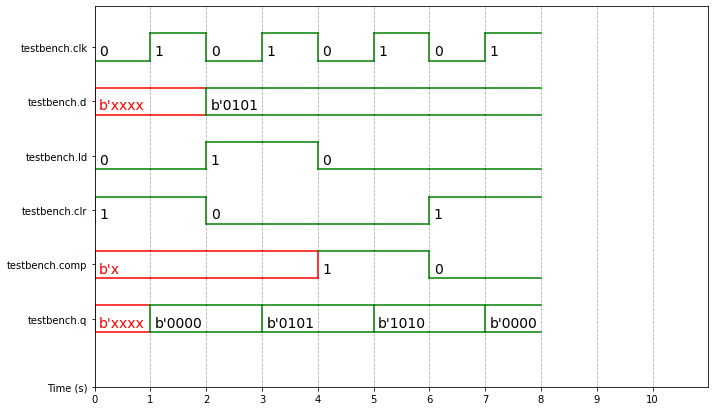

In [ ]:
%%waveform circuito25.vcd

sign_list = ['testbench.clk','testbench.d','testbench.ld', 'testbench.clr', 'testbench.comp', 'testbench.q']
time_begin = 0
time_end = 10
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Descreva um buffer tri-state com entrada de Enable em Verilog utilizando a **abordagem comportamental**. Neste exemplo explore o `don't care`.


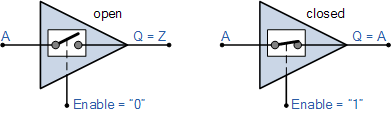

``Tabela original``

| Enable 	| A 	| Q 	|
|:------:	|:-:	|:-:	|
|    0   	| 0 	|  Z 	|
|    0   	| 1 	|  Z 	|
|    1   	| 0 	|  0 	|
|    1   	| 1 	|  1 	|

``Tabela com don't care``

| Enable 	| A 	| Q 	|
|:------:	|:-:	|:-:	|
|    0   	| X 	|  Z 	|
|    1   	| X 	|  A 	|


In [ ]:
%%file exercicio.sv

/*

Módulo circuito

*/
module exercicio ( /* Adicione seu código aqui */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Descrição comportamental
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg a, b;
  wire z;

  parameter period = 1;

  exercicio circuito26(.a(a), .enable(b), .q(z));

  initial begin
    $dumpfile("circuito26.vcd");
    $dumpvars;

    b = 0;
    a = 0;
    #period;

    b = 0;
    a = 1;
    #period;

    b = 1;
    a = 0;
    #period;

    b = 1;
    a = 1;
    #period;

    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito26.vcd

sign_list = ['testbench.a','testbench.b','testbench.z']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Simulação: Somador 4 bits

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito (a, b, cin, s, cout);
  // Declaração de portas
  input [3:0] a, b;
  input cin;
  output reg cout;
  output reg [3:0] s;

  // Variáveis auxiliares
  reg c;
  integer i;

  // Descrição comportamental
  always @(*) begin
    c = cin;
    for (i = 0; i <= 3; i=i+1) begin
      s[i] = a[i] ^ b[i] ^ c;
      c = (a[i] & b[i]) | (a[i] & c) | (b[i] & c);
    end
    cout = c;
  end
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg [3:0] a, b;
  reg cin;
  wire cout;
  wire [3:0] s;

  parameter period = 1;

  circuito circuito27(.a(a),.b(b),.cin(cin),.s(s),.cout(cout));

  initial begin
    $dumpfile("circuito27.vcd");
    $dumpvars;

    cin <= 0;
    a <= 4'b0010;
    b <= 4'b0001;
    #period;

    cin <= 1;
    a <= 4'b0100;
    b <= 4'b0010;
    #period;

    cin <= 0;
    a <= 4'b1011;
    b <= 4'b0100;
    #period;

    cin <= 1;
    a <= 4'b1000;
    b <= 4'b1001;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

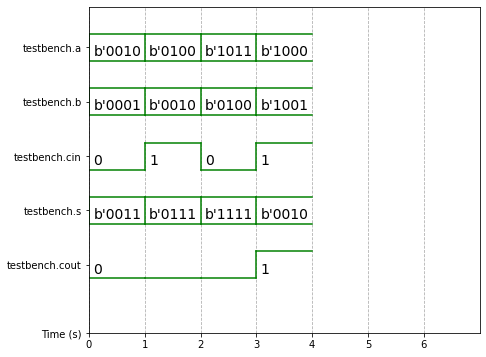

In [ ]:
%%waveform circuito27.vcd

sign_list = ['testbench.a','testbench.b','testbench.cin', 'testbench.s', 'testbench.cout']
time_begin = 0
time_end = 6
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Descreva um subtrator em Verilog utilizando a **abordagem comportamental**. Neste exemplo explore o `for`.

![subtrator](https://www.electronicshub.org/wp-content/uploads/2015/06/4-bit-Subtractor.jpg)

In [ ]:
%%file exercicio.sv

/*

Módulo circuito

*/
module exercicio ( /* Adicione seu código aqui */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Descrição comportamental
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg [3:0] a, b;
  wire borrow;
  wire [3:0] d;

  parameter period = 1;

  exercicio circuito28(.a(a),.b(b),.d(d),.borrow(borrow));

  initial begin
    $dumpfile("circuito28.vcd");
    $dumpvars;

    a <= 4'b0010;
    b <= 4'b0001;
    #period;

    a <= 4'b0100;
    b <= 4'b0010;
    #period;

    a <= 4'b1011;
    b <= 4'b0100;
    #period;

    a <= 4'b1000;
    b <= 4'b1001;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito28.vcd

sign_list = ['testbench.a','testbench.b','testbench.d', 'testbench.borrow']
time_begin = 0
time_end = 6
base = 'bin' # bin, dec, dec2, hex, octal

#### Simulação: Máquina de estados

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito ( clk, rst, x, y);
  // Declaração de portas
  input clk, rst, x;
  output reg y;

  // Declarando estados da máquina
  reg [1:0] estado_atual, estado_proximo;

  parameter A = 2'b00,
            B = 2'b01,
            C = 2'b10,
            D = 2'b11;

  // Reset e mudança de estado
  always @(posedge clk, posedge rst) begin
    if ( rst ) estado_atual <= A;
    else estado_atual <= estado_proximo;
  end

  // Descrição comportamental
  always @(estado_atual, x) begin
    case ({estado_atual})
      A : begin
        y = 0;
        if ( x == 1 ) estado_proximo = A;
        else estado_proximo = B;
      end
      B : begin
        y = 1;
        if ( x == 1 ) estado_proximo = C;
        else estado_proximo = B;
      end
      C : begin
        y = 1;
        estado_proximo = D;
      end
      D : begin
        y = 0;
        estado_proximo = A;
      end
    endcase
  end
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg clk, rst, x;
  wire y;

  parameter period = 1;

  circuito circuito29(.clk(clk),.rst(rst),.x(x), .y(y));

  initial begin
    $dumpfile("circuito29.vcd");
    $dumpvars;

    clk <= 0;
    rst <= 1;
    x <= 0;
    #period;

    #period;

    rst <= 0;
    #period;

    #period;

    $dumpoff;
    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

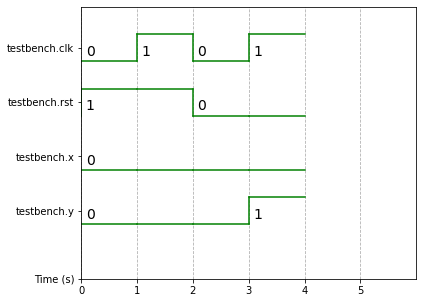

In [ ]:
%%waveform circuito29.vcd

sign_list = ['testbench.clk','testbench.rst','testbench.x', 'testbench.y']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Descreva a máquina de estados de Moore que contém Clear (CLR) e Enable (TOG_EN) em Verilog utilizando a **abordagem comportamental**. O Clear vai limpar o valor do registrador, enquanto que o Enable vai setar o valor para 1.

![diagrama](https://wiki.sj.ifsc.edu.br/images/c/cc/SST_FSM_ex1_diagrama_vhdl.png)

In [ ]:
%%file exercicio.sv

/*

Módulo circuito

*/
module exercicio ( /* Adicione seu código aqui */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Descrição comportamental
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "exercicio.sv"

module testbench();
  reg clk, clr, togen;
  wire z1;

  parameter period = 1;

  exercicio circuito30(.clk(clk),.clr(clr),.togen(togen), .z1(z1));

  initial begin
    $dumpfile("circuito30.vcd");
    $dumpvars;

    clk <= 0;
    clr <= 1;
    togen <= 1;
    #period;

    #period;

    clr <= 0;
    #period;

    #period;

    $dumpoff;
    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito30.vcd

sign_list = ['testbench.clk','testbench.clr','testbench.togen', 'testbench.z1']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Simulação: Memória

In [ ]:
%%file circuito.sv

/*

Módulo circuito

*/
module circuito( clk, w_data, w_addr, w_en, r_data, r_addr );
  // Declaração de portas
  input [7:0] w_data;
  input [3:0] w_addr, r_addr;
  input clk, w_en;
  output [7:0] r_data;

  // Declarando banco de memória
  reg [7:0] register_file [15:0];

  // Descrição comportamental
  always @( posedge clk ) begin
    if ( w_en ) register_file[w_addr] <= w_data;
  end

  assign r_data = register_file[r_addr];
endmodule


In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg [7:0] w_data;
  reg [3:0] w_addr, r_addr;
  reg clk, w_en;
  wire [7:0] r_data;

  parameter period = 1;

  circuito circuito31(.clk(clk),.w_data(w_data),.w_addr(w_addr),.w_en(w_en),.r_data(r_data),.r_addr(r_addr));

  initial begin
    $dumpfile("circuito31.vcd");
    $dumpvars;

    clk <= 0;
    w_data <= 8'b01011010;
    w_addr <= 4'b0010;
    r_addr <= 4'b0010;
    w_en <= 1'b0;
    #period;

    #period;

    w_en <= 1'b1;
    #period;

    #period;

    #period;

    #period;

    $dumpoff;
    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

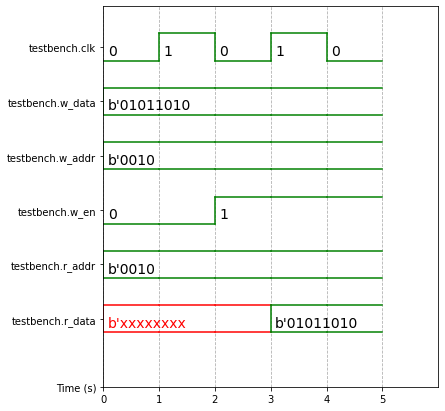

In [ ]:
%%waveform circuito31.vcd

sign_list = ['testbench.clk','testbench.w_data', 'testbench.w_addr', 'testbench.w_en',  'testbench.r_addr', 'testbench.r_data']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

#### Exercício

Implemente, em Verilog usando a **abordagem comportamental**, uma memória de 16 posições onde cada posição guarda 1 byte, que possua uma porta de leitura e uma porta de escrita. Atenção: A Leitura é assíncrona! Além disso, observe que os endereços dessa memória contém 16 bits.

![memoria](https://carlacastanho.github.io/Material-de-APC/assets/images/Ponteiros/mem.png)

In [ ]:
%%file exercicio.sv

/*

Módulo circuito

*/
module exercicio ( /* Adicione seu código aqui */ );
  // Declaração de portas
  /*
    Adicione seu código aqui
  */

  // Descrição comportamental
  /*
    Adicione seu código aqui
  */

endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg [7:0] w_data;
  reg [15:0] w_addr, r_addr;
  reg clk, w_en;
  wire [7:0] r_data;

  parameter period = 1;

  circuito circuito32(.clk(clk),.w_data(w_data),.w_addr(w_addr),.w_en(w_en),.r_data(r_data),.r_addr(r_addr));

  initial begin
    $dumpfile("circuito32.vcd");
    $dumpvars;

    clk <= 0;
    w_data <= 8'b0001_0100;
    w_addr <= 16'hFF02;
    r_addr <= 16'hFF02;
    w_en <= 1'b0;
    #period;

    #period;

    w_en <= 1'b1;
    #period;

    #period;

    #period;

    #period;

    $dumpoff;
    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o circuito_testbench
vvp circuito_testbench

In [ ]:
%%waveform circuito32.vcd

sign_list = ['testbench.clk','testbench.w_data', 'testbench.w_addr', 'testbench.w_en',  'testbench.r_addr', 'testbench.r_data']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

## Teste dos circuitos (Testbench)
---

- Teste dos sistemas digitais descritos em verilog.

In [ ]:
%%file circuito.sv
module circuito( a, b, c );
  // Declaracao de portas
  input a, b;
  output c;
  // Descricao por fluxos de dados
  assign c = a & b;
endmodule

In [ ]:
%%file testbench.v
`include "circuito.sv"

module testbench();
  reg a, b;
  wire c;

  parameter period = 1;

  circuito gate_and(.a(a),.b(b),.c(c));

  initial begin
    $dumpfile("gate_and.vcd");
    $dumpvars;

    a <= 0;
    b <= 0;
    #period;

    a <= 0;
    b <= 1;
    #period;

    a <= 1;
    b <= 0;
    #period;

    a <= 1;
    b <= 1;
    #period;
    $dumpoff;
    $finish;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o gate_and_testbench
vvp gate_and_testbench

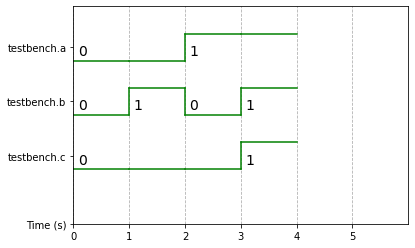

In [ ]:
%%waveform gate_and.vcd

sign_list = ['testbench.a','testbench.b', 'testbench.c']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

In [ ]:
%%file ffd.sv
module ffd (d, rst, clk, q);
  // Declaração de portas
  input clk, rst, d;
  output reg q;

  // Descrição comportamental
  always @(posedge clk, posedge rst) begin
    if ( rst == 1'd1 ) q = 1'd0;
    else q = d;
  end
endmodule

In [ ]:
%%file testbench.v
`include "ffd.sv"

module testbench();
  reg clk, rst, d;
  wire q;

  parameter period = 1;

  ffd flip_flop_d(.d(d), .rst(rst), .clk( clk ), .q( q ));

  initial begin
    $dumpfile("flipflopd.vcd");
    $dumpvars;
    clk <= 0;
    rst = 1;
    d = 0;
    #period;

    rst = 0;
    d = 1;
    #period;

    rst = 1;
    d = 1;
    #period;

    rst = 0;
    d = 1;
    #period;

    rst = 0;
    d = 0;
    #period;

    rst = 0;
    d = 0;
    #period;

    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

In [ ]:
%%bash
iverilog testbench.v -o flipflopd_testbench
vvp flipflopd_testbench

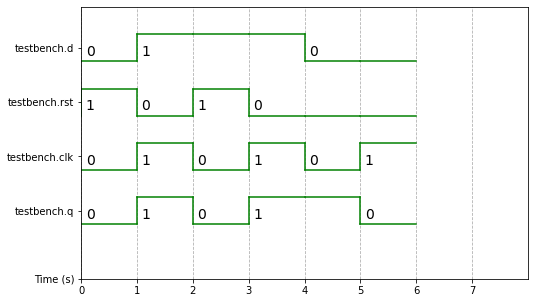

In [ ]:
%%waveform flipflopd.vcd

sign_list = ['testbench.d','testbench.rst', 'testbench.clk', 'testbench.q']
time_begin = 0
time_end = 7
base = 'bin' # bin, dec, dec2, hex, octal